<a href="https://colab.research.google.com/github/Zekun-Yang/Boston_house-price/blob/master/ADOS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the dataset from github

In [14]:
import pandas as pd
import requests

url = "https://github.com/Zekun-Yang/monas-dataset/raw/master/ADOS-DUMMY-RESULTS.csv"
data = pd.read_csv(url)
data.shape

(1998, 23)

have a look at the dataset

In [15]:
data.head()

,user_id,diagnosis,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21
0,eyJhbGciOiJIUzI1NiJ9.NjMy.ka2YbVyGz3FBi5QACKSp...,False,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,eyJhbGciOiJIUzI1NiJ9.MTA5OQ.9VWi8AfWrOQl9ARFl-...,False,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,eyJhbGciOiJIUzI1NiJ9.MjI2.Fug-oDVpDae5J7i15xCM...,False,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
3,eyJhbGciOiJIUzI1NiJ9.NTA2.mbHzYw01DHwkuRZJqO04...,False,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,eyJhbGciOiJIUzI1NiJ9.MTI3Mg.zyc8OxBd2XJuca4EGK...,False,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1


It is found out that the dataset is imbalance (the number of negative examples is much larger than the number of positive examples). 
Thus, the accuracy of the model is not a useful metric.

In [16]:
import numpy as np

neg, pos = np.bincount(data['diagnosis'])
total = neg + pos

print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))



Examples:
    Total: 1998
    Positive: 308 (15.42% of total)



change the boolean value in the diagnosis conlum into numeric value and drop the userid conlum

In [17]:
data['diagnosis'] = data['diagnosis'].astype(int)
data.pop('user_id')

0       eyJhbGciOiJIUzI1NiJ9.NjMy.ka2YbVyGz3FBi5QACKSp...
1       eyJhbGciOiJIUzI1NiJ9.MTA5OQ.9VWi8AfWrOQl9ARFl-...
2       eyJhbGciOiJIUzI1NiJ9.MjI2.Fug-oDVpDae5J7i15xCM...
3       eyJhbGciOiJIUzI1NiJ9.NTA2.mbHzYw01DHwkuRZJqO04...
4       eyJhbGciOiJIUzI1NiJ9.MTI3Mg.zyc8OxBd2XJuca4EGK...
                              ...                        
1993    eyJhbGciOiJIUzI1NiJ9.MzUx.bFAQ4--N1DHHyxGvUur_...
1994    eyJhbGciOiJIUzI1NiJ9.MTE5NA.YkNtvsYMXfP712e9zc...
1995    eyJhbGciOiJIUzI1NiJ9.MTI1.q5UMF_-SIgTGiUJv7ShV...
1996    eyJhbGciOiJIUzI1NiJ9.MTEwNA.Y8J96HsxmNFvNsvGyb...
1997    eyJhbGciOiJIUzI1NiJ9.MjI2.Fug-oDVpDae5J7i15xCM...
Name: user_id, Length: 1998, dtype: object

check if there is missing data

In [18]:
data.isna().sum()

diagnosis    0
column_1     0
column_2     0
column_3     0
column_4     0
column_5     0
column_6     0
column_7     0
column_8     0
column_9     0
column_10    0
column_11    0
column_12    0
column_13    0
column_14    0
column_15    0
column_16    0
column_17    0
column_18    0
column_19    0
column_20    0
column_21    0
dtype: int64

Some statistics about the dataset

In [19]:
data_stats = data.describe()
data_stats.pop('diagnosis')
data_stats

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.00000,1998.000000,1998.000000,1998.000000
mean,0.396897,0.397397,0.294294,0.347347,0.423924,0.418919,0.414915,0.436436,0.409910,0.360360,0.346346,0.438438,0.413413,0.419920,0.425425,0.398398,0.413914,0.37037,0.422923,0.339339,0.403904
std,0.719658,0.735557,0.455839,0.598337,0.775803,0.763582,0.753903,0.768505,0.755976,0.593126,0.593036,0.773215,0.777281,0.757763,0.794444,0.757825,0.751794,0.60042,0.773118,0.597075,0.745223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.00000,3.000000,2.000000,3.000000


split data into test set and evaluate set

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(data, test_size=0.2)
y_train = x_train.pop('diagnosis')
y_test = x_test.pop('diagnosis')

data normalisation

In [21]:
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()

creat a dense NN model

In [22]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def create_model():
  model = keras.Sequential([
      layers.Flatten(input_shape=(21,1)),
      layers.Dense(12, activation='relu'),
      layers.Dense(1, activation='sigmoid')
    ])

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [23]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 21)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

predictions = model.predict(x_test)
p = []

for i in predictions:
  if i > 0.5:
    p.append(1)
  else:
    p.append(0)

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=p).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = [0,1], 
                     columns = [0,1])






13/13 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000


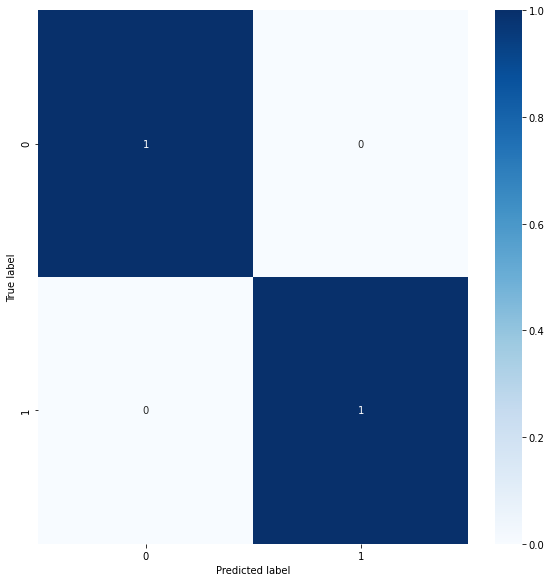

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()